In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

$X = 1$ con probabilidad $p$ y $X = 0$ con probabilidad $1-p$.

Luego,
$$
\begin{align}
H(X) &= -p \log(p) - (1-p) \log(1-p) \\
\end{align}
$$


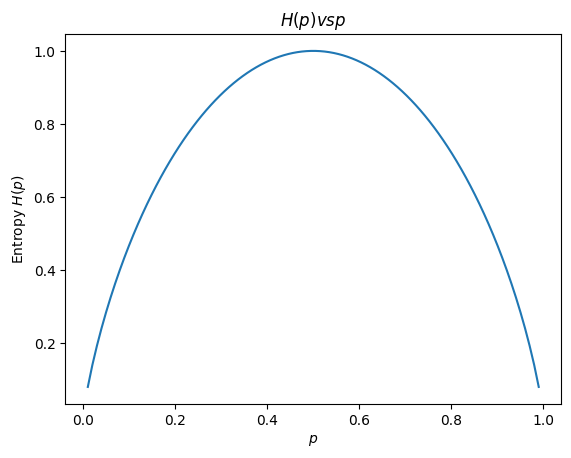

In [3]:
def entropy(p: float):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

p = np.linspace(0.01, 0.99, 100)
plt.plot(p, entropy(p))
plt.title('$H(p) vs p$')
plt.xlabel('$p$')
plt.ylabel('Entropy $H(p)$')
plt.show()


In [4]:
# Se lee el archivo CSV
data = pd.read_csv('DatasetHojas.csv', sep=',', header=0)
data_clase1 = data[data['Clase'] == 1]
data_clase2 = data[data['Clase'] == 2]

# Se separan los datos de cada clase en sus respectivas variables
altura_clase1 = data_clase1['Largo']
ancho_clase1 = data_clase1['Ancho']
altura_clase2 = data_clase2['Largo']
ancho_clase2 = data_clase2['Ancho']



### Entropía conjunta 
$$ H(X,Y) = - \sum_{x} \sum_{y} \ p(x,y) \log p(x,y) $$


In [5]:
# Histograma de la clase 1 usando plt

# plt.hist2d(altura_clase1, ancho_clase1, bins=5, cmap='Blues')
# plt.colorbar(label='Cantidad de datos')
# plt.title('Clase 1')
# plt.xlabel('Largo')
# plt.ylabel('Ancho')
# plt.show()


# Histograma de la clase 1 usando numpy
hist, _, _ = np.histogram2d(altura_clase1, ancho_clase1, bins=5)
# print(hist)

# Se calcula la probabilidad que hay en cada bin
joint_prob = hist / np.sum(hist)
# print(prob)

def joint_entropy(prob: np.ndarray) -> float:
    """ Calcula la entropía conjunta de una matriz de probabilidades """
    H = 0
    for i in range(prob.shape[0]):
        for j in range(prob.shape[1]):
            if prob[i][j] != 0:
                H += prob[i][j] * np.log2(prob[i][j])
    return -H

print('Entropía conjunta clase 1:',joint_entropy(joint_prob))

Entropía conjunta clase 1: 3.0321465454645993


### Entropía condicional
$$
\begin{align}
H(Y|X) &= \sum_{x} \ p(x) H(Y|X = x) \\
&= - \sum_{x} \ p(x) \sum_{y} \ p(y|x) \log p(y|x) \\
&= - \sum_{x} \sum_{y} \ p(x,y) \log p(y|x) \\
\end{align}
$$

In [6]:
def conditional_distribution(joint_probability: np.ndarray)-> np.ndarray:
    """ Calcula la probabilidad condicional dada la probabilidad conjunta """
    conditional_prob = np.zeros(joint_probability.shape)
    for i in range(joint_probability.shape[0]):
        for j in range(joint_probability.shape[1]):
            conditional_prob[i][j] = joint_probability[i][j] / np.sum(joint_probability[i])
    return conditional_prob

conditional_prob_clase1 = conditional_distribution(joint_prob)

def conditional_entropy(conditional_prob: np.ndarray, joint_prob: np.ndarray) -> float:
    """ Calcula la entropía condicional de una matriz de probabilidades """
    H = 0
    for i in range(conditional_prob.shape[0]):
        for j in range(conditional_prob.shape[1]):
            if conditional_prob[i][j] != 0:
                H += joint_prob[i][j] * np.log2(conditional_prob[i][j])
    return -H

print('Entropía condicional clase 1:',conditional_entropy(conditional_prob_clase1, joint_prob))



Entropía condicional clase 1: 1.3115433811024402


##### Por regla de la cadena la entropía condicional también se puede escribir como: 
$$ H(X,Y) = H(X) + H(Y|X) $$

In [7]:
print('Entropía conjunta clase 1:',joint_entropy(joint_prob))

# Marginal altura clase 1 a partir del histograma
marginal_altura_clase1 = np.sum(joint_prob, axis=1)
H_X = 0
for i in range(marginal_altura_clase1.shape[0]):
    if marginal_altura_clase1[i] != 0:
        H_X += marginal_altura_clase1[i] * np.log2(marginal_altura_clase1[i])
H_X = -H_X  #cambio de signo por el menos de la fórmula


print("Corroboración:" , H_X + conditional_entropy(conditional_prob_clase1, joint_prob))

Entropía conjunta clase 1: 3.0321465454645993
Corroboración: 3.032146545464599


#### Entropía relativa e información mutua

In [8]:
def relative_entropy(P: np.ndarray, Q: np.ndarray) -> float:
    D = 0
    for p in range(P.shape[0]):
        for q in range(Q.shape[1]):
            if P[p][q] != 0:
                D += P[p][q] * np.log2(P[p][q] / Q[p][q])
    return D

In [9]:
def mutual_information(X: np.ndarray, Y: np.ndarray, marg_prob_X, marg_prob_Y, joint_prob) -> float:
    I = 0
    for x in range(marg_prob_X.shape[0]):
        for y in range(marg_prob_Y.shape[0]):
            if joint_prob[x][y] != 0:
                I += joint_prob[x][y] * np.log2(joint_prob[x][y] / (marg_prob_X[x] * marg_prob_Y[y]))
    return I

hist_clase1, _, _ = np.histogram2d(altura_clase1, ancho_clase1, bins=5)
joint_prob_clase1 = hist_clase1 / np.sum(hist_clase1)

marginal_altura_clase1 = np.sum(joint_prob_clase1, axis=1)
marginal_ancho_clase1 = np.sum(joint_prob_clase1, axis=0)

print('Información mutua clase 1:',mutual_information(altura_clase1, ancho_clase1, marginal_altura_clase1, marginal_ancho_clase1, joint_prob_clase1))


# Lo mismo para ancho1 y ancho2
ancho1 = np.array(ancho_clase1)[:ancho_clase2.shape[0]]
ancho2 = ancho_clase2

hist_anchos, _, _ = np.histogram2d(ancho1, ancho2, bins=5)
joint_prob_anchos = hist_anchos / np.sum(hist_anchos)

marginal_ancho1 = np.sum(joint_prob_anchos, axis=1)
marginal_ancho2 = np.sum(joint_prob_anchos, axis=0)

print('Información mutua anchos:',mutual_information(ancho1, ancho2, marginal_ancho1, marginal_ancho2, joint_prob_anchos))


Información mutua clase 1: 0.5300115307683494
Información mutua anchos: 0.0796008638042334


Medir H(ancho 1 y ancho 2) 

H (largo 1 y ancho 2) 

H (A1 | L1) 

H (A2 | L2) 

H (A1 | A2) 

H (L1 | L2) 

Tabla columna A1, columna A2, fila L1, fila L2 

Medir I(A,L) = H(A) - H(A|L) 

D(C1 || C2) -> la conjunta 

##### Se generan muestras de una Uniforme [0,1] y hacemos su histograma

##### A esas muestras de esas uniformes le aplico -log2 que es una función convexa, hacemos su histograma y los comparamos.

##### Luego comprobamos la desigualdad de Jensen

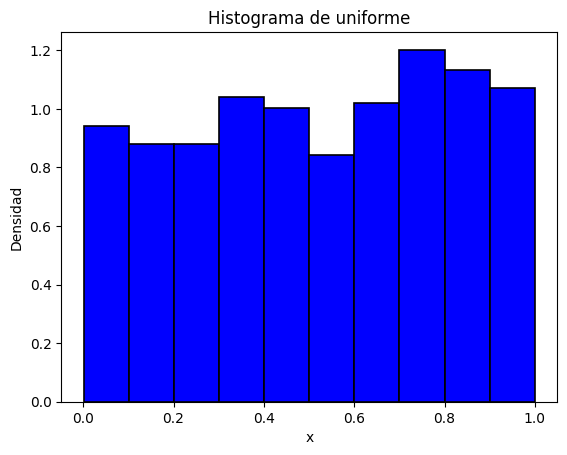

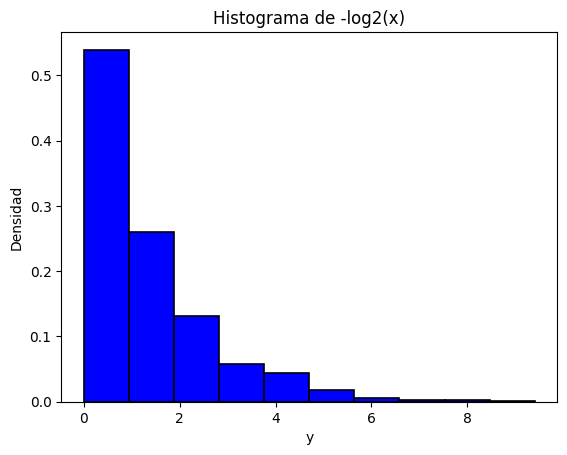

f(E[X])= 0.9404649009520382
E[f(X)]= 1.3434703640214216


In [19]:
# generar muestras de uniforme 0 a 1
x = np.random.uniform(0, 1, 1000)
# Histograma
plt.hist(x, bins=10, density=True, color='blue', edgecolor='black', linewidth=1.2)
plt.title('Histograma de uniforme')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.show()

# Por cada muestra le aplica -np.log2(x) y hago histograma
y = -np.log2(x)
plt.hist(y, bins=10, density=True, color='blue', edgecolor='black', linewidth=1.2)
plt.title('Histograma de -log2(x)')
plt.xlabel('y')
plt.ylabel('Densidad')
plt.show()

print("f(E[X]) = ", -np.log2(np.mean(x)))
print("E[f(X)] = ", np.mean(y))


##### Desigualdad de información

$$ D(p||q) \geq 0 $$